In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

In [52]:
#Read CSV File for processing
df = pd.read_csv(r'C:\Users\Mew\Desktop\Untitled Folder\winequality-white.csv').dropna()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


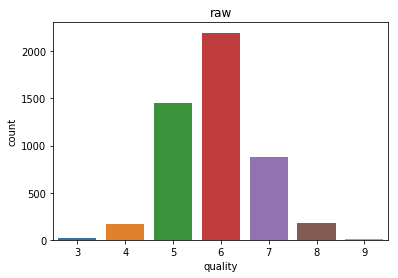

In [53]:
#For this first round, we attempt to do balancing

plt.figure()

sns.countplot('quality', data=df)

plt.title('raw')

plt.show()

In [54]:
df.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [55]:
#From graph, qualities 3 and 9 are too small. Therefore we do a mapping to convert them for dropping

dict_quality= {
    4: 4,
    5: 5,
    6: 6,
    7: 7,
    8: 8
}

df['quality'] = df['quality'].map(dict_quality)

#drop NaN columns
df = df.dropna()

df.quality.value_counts()

6.0    2198
5.0    1457
7.0     880
8.0     175
4.0     163
Name: quality, dtype: int64

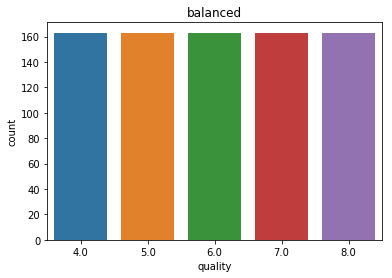

In [56]:
# Shuffle the Dataset.
shuffled_df = df.sample(frac=1,random_state=4)

# Put all the minority class in a separate dataset.
q4_df = shuffled_df.loc[shuffled_df['quality'] == 4]

#Randomly select ? observations from the majority classes
q5_df = shuffled_df.loc[shuffled_df['quality'] == 5].sample(n = 163,random_state=42)

q6_df = shuffled_df.loc[shuffled_df['quality'] == 6].sample(n = 163,random_state=42)

q7_df = shuffled_df.loc[shuffled_df['quality'] == 7].sample(n = 163,random_state=42)

q8_df = shuffled_df.loc[shuffled_df['quality'] == 8].sample(n = 163,random_state=42)


# Concatenate both dataframes again
normalized_df = pd.concat([q4_df, q5_df, q6_df, q7_df, q8_df])

plt.figure()

sns.countplot('quality', data=normalized_df)

plt.title('balanced')

plt.show()

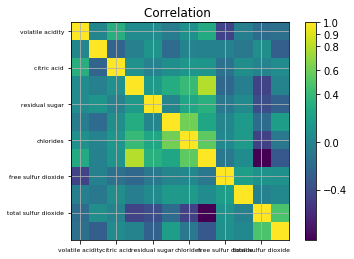

In [57]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

cax = ax1.imshow(normalized_df.corr(), interpolation="nearest")
ax1.grid(True)
plt.title('Correlation ')
labels=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality',]
ax1.set_xticklabels(labels,fontsize=6)
ax1.set_yticklabels(labels,fontsize=6)
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax, ticks=[-0.4,0,.4,.6,.8,.9,1])
plt.show()

In [59]:
normalized_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.016584,0.329899,0.056514,0.060271,-0.050574,0.089945,0.290890,-0.452254,-0.034397,-0.178733,-0.149701
volatile acidity,0.016584,1.000000,-0.224522,-0.030362,0.120079,-0.187926,-0.008338,-0.017716,-0.020118,-0.091873,0.075972,-0.270637
citric acid,0.329899,-0.224522,1.000000,0.098169,-0.013620,0.085717,0.132832,0.123602,-0.142096,0.080407,-0.007040,0.055588
residual sugar,0.056514,-0.030362,0.098169,1.000000,0.165737,0.307634,0.410608,0.800518,-0.202572,-0.044165,-0.447238,-0.007361
chlorides,0.060271,0.120079,-0.013620,0.165737,1.000000,0.006899,0.249668,0.336599,-0.095332,0.049257,-0.387237,-0.252224
free sulfur dioxide,-0.050574,-0.187926,0.085717,0.307634,0.006899,1.000000,0.609156,0.253535,0.009701,0.159906,-0.174681,0.193370
total sulfur dioxide,0.089945,-0.008338,0.132832,0.410608,0.249668,0.609156,1.000000,0.547447,0.029441,0.157182,-0.467077,-0.091645
density,0.290890,-0.017716,0.123602,0.800518,0.336599,0.253535,0.547447,1.000000,-0.094401,0.065005,-0.821279,-0.320873
pH,-0.452254,-0.020118,-0.142096,-0.202572,-0.095332,0.009701,0.029441,-0.094401,1.000000,0.198060,0.109663,0.093974
sulphates,-0.034397,-0.091873,0.080407,-0.044165,0.049257,0.159906,0.157182,0.065005,0.198060,1.000000,-0.021512,0.028819


In [70]:
#use volatile acidity(1), chloride(4), density(7), alcohol(10)
ds1_4 = df.iloc[:, [1,4,7,10]]
print (ds1_4.head())

   volatile acidity  chlorides  density  alcohol
0              0.27      0.045   1.0010      8.8
1              0.30      0.049   0.9940      9.5
2              0.28      0.050   0.9951     10.1
3              0.23      0.058   0.9956      9.9
4              0.23      0.058   0.9956      9.9


In [71]:
x = df.iloc[:, [1,4,7,10]].values
print(type(x))
print(x[0:5,:])

<class 'numpy.ndarray'>
[[ 0.27    0.045   1.001   8.8   ]
 [ 0.3     0.049   0.994   9.5   ]
 [ 0.28    0.05    0.9951 10.1   ]
 [ 0.23    0.058   0.9956  9.9   ]
 [ 0.23    0.058   0.9956  9.9   ]]


In [72]:
km2 = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

km2.fit(x)
y_kmeans = km2.fit_predict(x)

In [73]:
ds1_4[y_kmeans==0].head()

,volatile acidity,chlorides,density,alcohol
9,0.22,0.044,0.9938,11.0
10,0.27,0.033,0.9908,12.0
12,0.18,0.040,0.9920,10.8
13,0.16,0.044,0.9912,12.4
15,0.17,0.032,0.9914,11.4


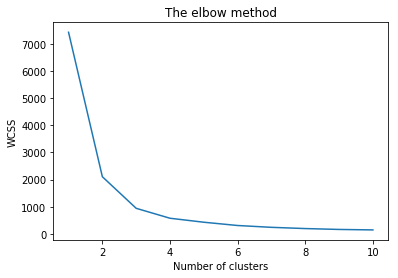

In [74]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

# Trying kmeans for k=1 to k=10
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [75]:
#k-means with 3 clusters

#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

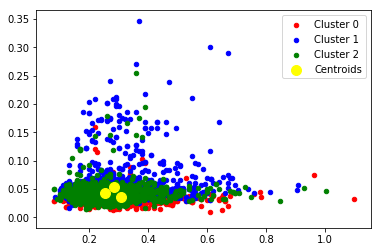

In [76]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 20, c = 'red', label = 'Cluster 0')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 20, c = 'blue', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 20, c = 'green', label = 'Cluster 2')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

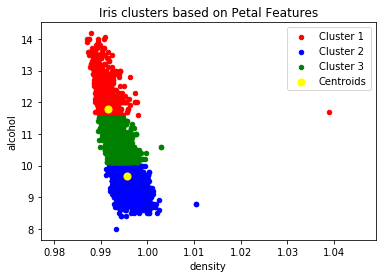

In [77]:
#Visualising the clusters by selecting only column 3 and 4
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], s = 20, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3], s = 20, c = 'green', label = 'Cluster 3')

#Plotting the centroids of the clusters
plt.scatter(km2.cluster_centers_[:, 2], km2.cluster_centers_[:,3], s = 50, c = 'yellow', label = 'Centroids')
plt.title('Iris clusters based on Petal Features')
plt.xlabel(df.columns[7])
plt.ylabel(df.columns[10])

plt.legend()
plt.show()

In [ ]:
x2 = df.iloc[:, [1,4,7,10]].values
print(type(x))
print(x[0:5,:])